<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/banner_IA.png"  width="1000px" height="200px">

# **Taller 03:  Statistics**

## **Outline**

1. [Ejercicio 1.](#eje1)
2. [Ejercicio 2.](#eje2)
2. [Ejercicio 3.](#eje3)
2. [Ejercicio 4.](#eje4)
2. [Ejercicio 5.](#eje5)

In [ ]:
#@title **Execute this cell**
#@markdown Please include your student id
import sys
import inspect

group_id = "IA1-20221-H1" #@param {type:"string"}
assignment_id = group_id +'.taller_statistic'
student_id = "2218109" #@param {type:"string"}
"""
Put your student ID here

Example: student_id =  '2152145'
""" 

"\nPut your student ID here\n\nExample: student_id =  '2152145'\n"

In [ ]:
 #@title **Execute this cell**
#@markdown **UTILS**
#@markdown Please dont modify any line in this cell

import os
import json
import requests
from collections import namedtuple


Config = namedtuple('Config', ['server_name'])
config = Config(server_name='https://bivlabgrader.azurewebsites.net/api')


def check_solution_and_evaluate(assignment_id: str, student_func_str: str):

    # Set the endpoint and payload.
    payload = {
        'func_str': student_func_str,
        'assignment_id': assignment_id,
        'student_id': student_id
    }
    endpoint_url = config.server_name + '/CheckAndEvaluateSolution'
    # print(endpoint_url)

    # Make request to server with the data coming from the notebook.
    r = requests.post(endpoint_url, params=payload)
    pprint_json_response(r.json())
    return r


def pprint_json_response(response, indent=0):
    """Pretty print the response."""
    for key, value in response.items():
        print('\t' * indent + str(key.capitalize()))

        # If dictionary, do a recurrent call.
        if isinstance(value, dict):
            pprint_json_response(value, indent + 1)
        else:
            # Enumerate elements if list.
            if isinstance(value, list):
                if len(value) == 1:
                    print('\t' * (indent + 1) + str(value[0]))
                else:
                    for i, e in enumerate(value, start=1):
                        print('\t' * (indent + 1) + f'{i}. {e}')
            else:
                print('\t' * (indent + 1) + str(value))

In [ ]:
#@title **Import libraries**

import numpy as np
import pandas as pd
import scipy.stats as stats

In [ ]:
#@title **MONTAR EL DRIVE** { display-mode: "form" }
import os
from google.colab import drive

path_ai = "ai-uis-student" #@param {type:"string"}
path = "/content/drive/My Drive/" + path_ai
drive.mount('/content/drive')
os.chdir(path)
print(os.getcwd())

---
# **Ejercicio 1**  <a name="eje1"></a>
---

Se tiene un conjunto de valores correspondientes a los salarios de una empresa. Complete la función ``analytic_prob`` para que dado un conjunto de valores ``X`` calcule de forma analítica el valor flotante de

$$P(X>a\;\; \&\;\; X<b)$$

para ello usa la función CDF que tiene la distribución sabiendo que:

$$P(X<t) = CDF_X(t)$$

In [ ]:
def analytic_prob(X, a, b):
  #  Importing allowed libraries
  import scipy.stats as stats
  import numpy as np

  """Put your code here"""

  return prob

In [ ]:
 #@title **send your answer**
student_func_str = inspect.getsource(analytic_prob)
r = check_solution_and_evaluate(assignment_id, student_func_str)

### **Heart disease Dataset**

Los siguientes ejercicios se basan en el siguiente dataset en el cual se han caracterizado diferentes pacientes con 13 mediciones médicas (``f1,f2,...,f13``) y un diagnóstico (``presence``): donde ``0`` representa normalidad y ``1,2,3,4`` presencia de enfermedad.



f1   f2   f3     f4     f5   f6   f7     f8   f9  f10  f11  f12  f13  \
0  63.0  1.0  1.0  145.0  233.0  1.0  2.0  150.0  0.0  2.3  3.0  0.0  6.0   
1  67.0  1.0  4.0  160.0  286.0  0.0  2.0  108.0  1.0  1.5  2.0  3.0  3.0   
2  67.0  1.0  4.0  120.0  229.0  0.0  2.0   69.0  1.0  2.6  2.0  2.0  7.0   

   presence  
0         0  
1         2  
2         1

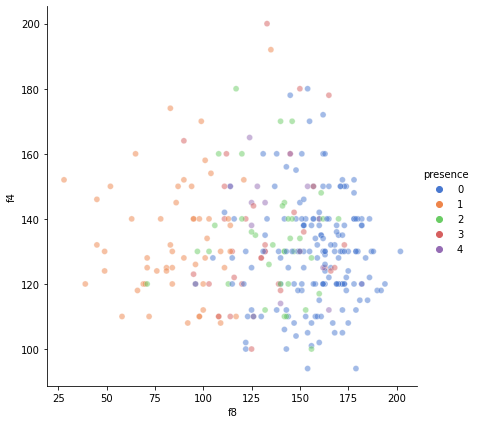

In [ ]:
#@title **Exploring data**
variable_x = "f8" #@param {type:"string"}
variable_y = "f4" #@param {type:"string"}
# variable_s = "curtosis" #@param {type:"string"}

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_h = pd.read_csv("https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/-/raw/master/hearth_disease.csv",  sep=",")
sns.relplot(x=variable_x, y=variable_y, hue="presence", sizes = 150,
            alpha=.5, palette="muted",
            height=6, data=data_h);

data_h.head(3)

---
# **Ejercicio 2**  <a name="eje2"></a>
---

Escriba una función que reciba el dataset.
- Defina dos clases para la columna ``presence``, los pacientes sanos como clase ``0`` y clase ``1`` los demas pacientes que tienen algun grado de enfermedad.
- Devuelva la matriz de correlación. 
- También debe crear dos distribuciones normales con la variable `f8`, discriminadas por la clase `presence`.
- La función debe devolver la Kurtosis (cuarto momento estadístico) de cada distribución. Apóyese con ayuda de [scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kurtosis.html). 

La respuesta de la función debe ser: correlacion, Kurtosis para pacientes sanos, Kurtosis para pacientes enfermos. 

Ejemplo:

```
(                f1        f2        f3        f4        f5        f6  \
 f1        1.000000 -0.097542  0.104139  0.284946  0.208950  0.118530   
 f2       -0.097542  1.000000  0.010084 -0.064456 -0.199915  0.047862   
 f3        0.104139  0.010084  1.000000 -0.036077  0.072319 -0.039975   
 f4        0.284946 -0.064456 -0.036077  1.000000  0.130120  0.175340   
 f5        0.208950 -0.199915  0.072319  0.130120  1.000000  0.009841   
 f6        0.118530  0.047862 -0.039975  0.175340  0.009841  1.000000   
 f7        0.148868  0.021647  0.067505  0.146560  0.171043  0.069564   
 f8       -0.300522 -0.141333 -0.289577 -0.059491 -0.017424  0.063529   
 f9        0.091661  0.146201  0.384060  0.064762  0.061310  0.025665   
 f10       0.203805  0.102173  0.202277  0.189171  0.046564  0.005747   
 f11       0.161770  0.037533  0.152050  0.117382 -0.004062  0.059894   
 presence  0.223120  0.276816  0.414446  0.150825  0.085164  0.025264   
 
                 f7        f8        f9       f10       f11  presence  
 f1        0.148868 -0.300522  0.091661  0.203805  0.161770  0.223120  
 f2        0.021647 -0.141333  0.146201  0.102173  0.037533  0.276816  
 f3        0.067505 -0.289577  0.384060  0.202277  0.152050  0.414446  
 f4        0.146560 -0.059491  0.064762  0.189171  0.117382  0.150825  
 f5        0.171043 -0.017424  0.061310  0.046564 -0.004062  0.085164  
 f6        0.069564  0.063529  0.025665  0.005747  0.059894  0.025264  
 f7        1.000000 -0.112927  0.084867  0.114133  0.133946  0.169202  
 f8       -0.112927  1.000000 -0.344166 -0.222891 -0.279957 -0.633499  
 f9        0.084867 -0.344166  1.000000  0.288223  0.257748  0.431894  
 f10       0.114133 -0.222891  0.288223  1.000000  0.577537  0.424510  
 f11       0.133946 -0.279957  0.257748  0.577537  1.000000  0.339213  
 presence  0.169202 -0.633499  0.431894  0.424510  0.339213  1.000000  ,
 366289866.4332506,
 305440316.4067101)
```



In [ ]:
#@title **code student**
def matrix_correlation(data_h):
  #  Importing allowed libraries
  import pandas as pd
  import numpy as np
  import scipy.stats as stats

  
  """Put your code here"""

  return correlacion, momento_1, momento_2

In [ ]:
 #@title **send your answer**
student_func_str = inspect.getsource(matrix_correlation)
r = check_solution_and_evaluate(assignment_id, student_func_str)

---
# **Ejercicio 3**  <a name="eje3"></a>
---
Escriba una función que reciba un conjunto de valores de la variable ``f8`` y devuelva su respectiva clasificación. Para ello, la función debe:    
- Crear dos distribuciones normales: para los pacientes sanos y los enfermos.
- Asignar la clase a cada muestra, según la mayor probabilidad con respecto a las dos distribuciones normales. 
- Debe devolver una lista con cada predicción del conjunto de datos ingresado
  
  
Por ejemplo, para un vector de valores: 


```
[150 100 120  20  ...]
```
Se debe retornar una lista similar a la siguiente:

```
[0 1 1 1 ...]
```




In [ ]:
#@title **code student**
def batch_classification(batch, data_h): 
  #  Importing allowed libraries
  import pandas as pd
  import numpy as np
  import scipy.stats as stats
  
  """Put your code here"""

  return classification_array_batch

In [ ]:
 #@title **send your answer**
student_func_str = inspect.getsource(batch_classification)
r = check_solution_and_evaluate(assignment_id, student_func_str)

---
# **Ejercicio 4**  <a name="eje4"></a>
---

Realice una función que calcule los intervalos de confianza de las distribuciones correspondientes para pacientes sanos y con algun grado de enfermedad (i.e dos clases) de la variable ``f8``.

- Para las distribuciones normales se debe utilizar el LTC. Es decir calculando n medias (`N_means`), a partir de un conjunto de muestras  `size_sample`, que cambian aleatoriamente para cada media. 

- Construya una distribución normal para cada clase (sanos y con algun grado de enfermedad), una vez obtenida una lista con las múltiples medias (el tamaño de la lista es `N_means`).

- Retorne los valores de confianza para pacientes sanos y pacientes con enfermedad (en este orden) según un valor de confianza (`interval_conf`). 

Ejemplo de lo que debe retornar la función: 

```
((103.13532483638495, 127.31667516361505),
 (153.39928079785258, 162.40071920214743))
```

In [ ]:
#@title **code student**
def LTC_confidence(N_means, size_sample, data_h, interval_conf=0.95): 
  #  Importing allowed libraries
  import pandas as pd
  import numpy as np
  import scipy.stats as stats
  # Let's put a seed.
  np.random.seed(0)
  
  """Put your code here"""

  return var1, var2

In [ ]:
 #@title **send your answer**
student_func_str = inspect.getsource(LTC_confidence)
r = check_solution_and_evaluate(assignment_id, student_func_str)

---
# **Ejercicio 5**  <a name="eje5"></a>
---
Realice una función que aproxime una distribución normal de los datos de `varianza` utilizando la formulación analítica del LTC $\mathcal{N} \left ( \mu(X), \frac{\sigma(X)}{\sqrt{N}} \right )$. 

- La función debe recibir el parametro `N` y un conjunto de datos  (batch) de `'f8' `para que sean clasificados. 
- La función debe construir las distribuciones para pacientes sanos (0) y enfermos (1), respectivamente. 
- La función debe retornar las probabilidades analíticas respectivas del 'batch' de datos para cada clase en un diccionario cuyas llaves sean ``probs_0`` y ``probs_1`` para la clase de pacientes enfermos y sanos respectivamente.
- Tenga en cuenta la normalización de las distribuciones.

Un ejemplo del resultado, para el subconjunto: 

```
Ejemplo, batch: [150 100 120  20   5 200]
```

Se espera el siguiente resultado:

```
{'probs_0': [0.010552498271509288,
  1.422489450946197e-14,
  1.0838377315567581e-07,
  1.4956109682166782e-70,
  4.084536064001508e-86,
  1.2943613786407236e-08],
 'probs_1': [0.0006294890670138501,
  0.009428763923168895,
  0.017704198374237822,
  9.173328882998566e-14,
  1.3528392203671645e-17,
  2.661463475365108e-11]}
```




In [ ]:
#@title **code student**
def LTC_clasification(N_means, size_sample, data_h): 
  #  Importing allowed libraries
  import pandas as pd
  import numpy as np
  import scipy.stats as stats
  
  """Put your code here"""

  return classification

In [ ]:
 #@title **send your answer**
student_func_str = inspect.getsource(LTC_clasification)
r = check_solution_and_evaluate(assignment_id, student_func_str)

---
<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/bannerThanks.jpg" alt="Drawing" style="width:700px;"/>